In [2]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [5]:
# 현재경로 확인
os.getcwd()

'C:\\Users\\Uijeong'

In [6]:
# 데이터 불러오기
corolla=pd.read_csv(r'C:\Users\Uijeong\Desktop\05-11--machine-learning\Part 05~11) Machine Learning\06. 회귀분석\Data\part2_data\ToyotaCorolla.csv')
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [7]:
# 데이터 수와 변수의 수 확인하기
nCar=corolla.shape[0]
nVar=corolla.shape[1]
print(nCar,nVar)

1436 37


## 범주형 변수를 이진형 변수로 변환

In [14]:
## 가변수 생성
corolla.Fuel_Type.unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [15]:
dummy_p=np.repeat(0,nCar)
dummy_d=np.repeat(0,nCar)
dummy_c=np.repeat(0,nCar)

In [16]:
# 인덱스 슬라이싱 후 (binary = 1) 대입
p_idx=np.array(corolla.Fuel_Type=="Petrol")
d_idx=np.array(corolla.Fuel_Type=="Diesel")
c_idx=np.array(corolla.Fuel_Type=="CNG")

In [17]:
dummy_p[p_idx]=1
dummy_d[d_idx]=1
dummy_c[c_idx]=1 #원핫인코딩 느낌

## 불필요한 변수 제거 및 가변수 추가


In [18]:
#data frame 활용하여 하나로 묶어주기 

Fuel=pd.DataFrame({'Petrol':dummy_p,'Diesel':dummy_d,'CNG':dummy_c})

In [19]:
Fuel

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [26]:
corolla_=corolla.drop(['Id','Model','Fuel_Type'],axis=1, inplace=False)#지운다
mlr_data=pd.concat((corolla_,Fuel),1) #합친다 
mlr_data

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,12,1998,20544,86,1,0,1300,3,...,0,1,1,1,0,0,0,1,0,0
1432,10845,72,9,1998,19000,86,0,0,1300,3,...,0,0,1,1,0,0,0,1,0,0
1433,8500,71,10,1998,17016,86,0,0,1300,3,...,0,0,0,1,0,0,0,1,0,0
1434,7250,70,11,1998,16916,86,1,0,1300,3,...,0,0,0,1,0,0,0,1,0,0


In [27]:
# bias 추가
mlr_data=sm.add_constant(mlr_data,has_constant='add')
mlr_data.head() #덮어쓸때 조심하기 -> 또 실행하면 한번 더 추가됨

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0


## 설명변수(X), 타켓변수(Y) 분리 및 학습데이터와 평가데이터 분할

In [29]:
mlr_data.columns.difference(['Price']) #Price제외하고 가지고 옴

Index(['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic',
       'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider',
       'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders',
       'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color',
       'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps',
       'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio',
       'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const'],
      dtype='object')

In [30]:
feature_columns=list(mlr_data.columns.difference(['Price']))
X = mlr_data[feature_columns]
y = mlr_data.Price
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [31]:
# Train the MLR / 회귀모델적합
full_model=sm.OLS(train_y, train_x)
fitted_full_model=full_model.fit()

In [32]:
 ## R2가 높고, 대부분의 변수들이 유의
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     320.1
Date:                Tue, 02 Feb 2021   Prob (F-statistic):               0.00
Time:                        04:23:52   Log-Likelihood:                -8440.9
No. Observations:                1005   AIC:                         1.695e+04
Df Residuals:                     971   BIC:                         1.712e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS                -26.9131    140.172     -0.192      0.848    -301.988     248.162
Age_08_04         -120.7138      4.108    -29.384      0.000    -128.776    -112.652
Airbag_1           196.3945    278.474      0.705      0.481    -350.086     742.875
Airbag_2          -338.0906    142.647     -2.370      0.018    -618.022     -58.160
Airco              126.2214     94.004      1.343      0.180     -58.253     310.696
Automatic          362.8531    147.184      2.465      0.014      74.018     651.688
Automatic_airco   2341.4766    190.629     12.283      0.000    1967.384    2715.570
BOVAG_Guarantee    354.7434    137.700      2.576      0.010      84.520     624.967
Backseat_Divider  -239.1632    135.722     -1.762      0.078    -505.506      27.179
Boardcomputer     -305.6206    124.211     -2.461      0.014    -549.373     -61.868
CD_Player          142.4795    102.969      1.384      0.167     -59.588     344.547
CNG              -1125.4151    213.690     -5.267      0.000   -1544.763    -706.067
Central_Lock       -65.2394    148.875     -0.438      0.661    -357.392     226.913
Cylinders           -0.0334      0.002    -14.732      0.000      -0.038      -0.029
Diesel             140.3660    187.369      0.749      0.454    -227.330     508.062
Doors               96.5432     42.114      2.292      0.022      13.898     179.189
Gears              166.3727    194.442      0.856      0.392    -215.202     547.948
Guarantee_Period    43.5357     14.309      3.043      0.002      15.457      71.615
HP                  21.6111      3.588      6.023      0.000      14.569      28.653
KM                  -0.0172      0.001    -12.981      0.000      -0.020      -0.015
Met_Color          -54.7819     79.545     -0.689      0.491    -210.881     101.317
Metallic_Rim        75.1702     99.427      0.756      0.450    -119.947     270.288
Mfg_Month          -99.0930     10.753     -9.215      0.000    -120.195     -77.991
Mfg_Year             1.5792      0.814      1.940      0.053      -0.018       3.176
Mfr_Guarantee      222.8645     77.928      2.860      0.004      69.938     375.791
Mistlamps            1.3745    116.385      0.012      0.991    -227.020     229.769
Petrol             985.0408    202.307      4.869      0.000     588.031    1382.051
Power_Steering     -25.3909    309.647     -0.082      0.935    -633.046     582.264
Powered_Windows    482.8224    149.105      3.238      0.001     190.218     775.427
Quarterly_Tax       13.9948      2.140      6.540      0.000       9.795      18.194
Radio              736.6658    797.302      0.924      0.356    -827.968    2301.300
Radio_cassette    -834.6393    798.981     -1.045      0.296   -2402.568     733.289
Sport_Model        379.2307     90.890      4.172      0.000     200.866     557.595
Tow_Bar           -269.

## VIF를 통한 다중공선성 확인 

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    mlr_data.values, i) for i in range(mlr_data.shape[1])]
vif["features"] = mlr_data.columns
vif

C:\Users\Uijeong\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Uijeong\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


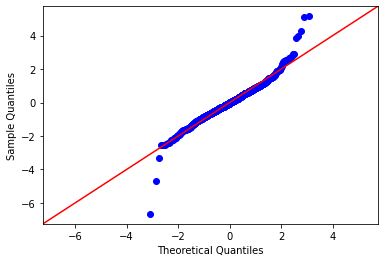

In [36]:
# 학습데이터의 잔차 확인
res=fitted_full_model.resid
# q-q plot # 정규분포 확인
fig = sm.qqplot(res, fit=True, line='45')

Text(0, 0.5, 'Residual')

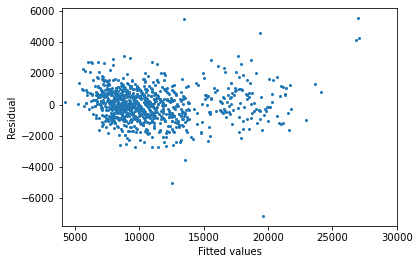

In [38]:
# residual pattern 확인
pred_y=fitted_full_model.predict(train_x)
import matplotlib.pyplot as plt
fig = plt.scatter(pred_y,res, s=4)
plt.xlim(4000,30000)
plt.xlim(4000,30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

In [41]:
 ## 검증 데이터에 대한 예측 
pred_y2=fitted_full_model.predict(test_x)

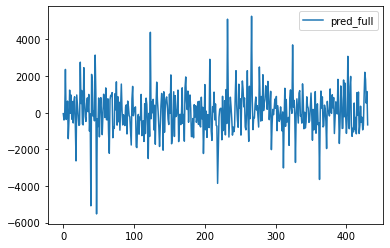

In [42]:
## 잔차 plot
plt.plot(np.array(test_y-pred_y2),label="pred_full")
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
## MSE 성능
mean_squared_error(y_true=test_y, y_pred=pred_y2)

1373586.4519687798

# 변수선택법

In [45]:
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
        
print(processSubset(X=train_x, y=train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000204650CDFD0>, 'AIC': 19028.86771086776}


In [46]:
processSubset(X=train_x, y=train_y, feature_set = feature_columns)


{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x20465236760>,
 'AIC': 16949.702538689424}

In [47]:
import time
import itertools
# getBest: 가장 낮은 AIC를 가지는 모델 선택 및 저장
def getBest(X,y,k):
    tic = time.time() # 시작시간
    results = [] # 결과 저장공간
    for combo in itertools.combinations(X.columns.difference(['const']), k): # 각 변수조합을 고려한 경우의 수
        combo=(list(combo)+['const'])
        
        results.append(processSubset(X,y,feature_set=combo))  # 모델링된 것들을 저장
    models = pd.DataFrame(results) # 데이터 프레임으로 변환
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time() # 종료시간
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc - tic),
          "seconds.")
    return best_model

print(getBest(X=train_x, y=train_y,k=2))

Processed  630 models on 2 predictors in 0.5410048961639404 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                17509.1
Name: 211, dtype: object


In [48]:
for combo in itertools.combinations(X.columns.difference(['const']), 2):
    print((list(combo)+['const']))

['ABS', 'Age_08_04', 'const']
['ABS', 'Airbag_1', 'const']
['ABS', 'Airbag_2', 'const']
['ABS', 'Airco', 'const']
['ABS', 'Automatic', 'const']
['ABS', 'Automatic_airco', 'const']
['ABS', 'BOVAG_Guarantee', 'const']
['ABS', 'Backseat_Divider', 'const']
['ABS', 'Boardcomputer', 'const']
['ABS', 'CD_Player', 'const']
['ABS', 'CNG', 'const']
['ABS', 'Central_Lock', 'const']
['ABS', 'Cylinders', 'const']
['ABS', 'Diesel', 'const']
['ABS', 'Doors', 'const']
['ABS', 'Gears', 'const']
['ABS', 'Guarantee_Period', 'const']
['ABS', 'HP', 'const']
['ABS', 'KM', 'const']
['ABS', 'Met_Color', 'const']
['ABS', 'Metallic_Rim', 'const']
['ABS', 'Mfg_Month', 'const']
['ABS', 'Mfg_Year', 'const']
['ABS', 'Mfr_Guarantee', 'const']
['ABS', 'Mistlamps', 'const']
['ABS', 'Petrol', 'const']
['ABS', 'Power_Steering', 'const']
['ABS', 'Powered_Windows', 'const']
['ABS', 'Quarterly_Tax', 'const']
['ABS', 'Radio', 'const']
['ABS', 'Radio_cassette', 'const']
['ABS', 'Sport_Model', 'const']
['ABS', 'Tow_Bar', 'con

In [49]:
# 변수 선택에 따른 학습시간과 저장
models = pd.DataFrame(columns=["AIC", "model"])
tic = time.time()
for i in range(1,4):
    models.loc[i] = getBest(X=train_x,y=train_y,k=i)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  36 models on 1 predictors in 0.04005146026611328 seconds.
Processed  630 models on 2 predictors in 0.5183811187744141 seconds.
Processed  7140 models on 3 predictors in 6.399282932281494 seconds.
Total elapsed time: 7.1381847858428955 seconds.


In [50]:
models

,AIC,model
1,17792.115410,<statsmodels.regression.linear_model.Regressio...
2,17509.139516,<statsmodels.regression.linear_model.Regressio...
3,17333.187163,<statsmodels.regression.linear_model.Regressio...


In [51]:
models.loc[3, "model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     2216.
Date:                Tue, 02 Feb 2021   Prob (F-statistic):               0.00
Time:                        04:41:10   Log-Likelihood:                -8662.6
No. Observations:                1005   AIC:                         1.733e+04
Df Residuals:                    1001   BIC:                         1.735e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KM            -0.0231      0.001    -17.103      0.000      -0.026      -0.020
Mfg_Year    1492.4946     37.117     40.210      0.000    1419.658    1565.331
Weight        18.9535      0.915     20.715      0.000      17.158      20.749
const      -2.992e+06   7.38e+04    -40.568      0.000   -3.14e+06   -2.85e+06
==============================================================================
Omnibus:                      214.803   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2864.258
Skew:                          -0.573   Prob(JB):                         0.00
Kurtosis:                      11.191   Cond. No.                     1.37e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
# 모든 변수들 모델링 한것과 비교 
print("full model Rsquared: ","{:.5f}".format(fitted_full_model.rsquared))
print("full model AIC: ","{:.5f}".format(fitted_full_model.aic))
print("full model MSE: ","{:.5f}".format(fitted_full_model.mse_total))
print("selected model Rsquared: ","{:.5f}".format(models.loc[3, "model"].rsquared))
print("selected model AIC: ","{:.5f}".format(models.loc[3, "model"].aic))
print("selected model MSE: ","{:.5f}".format(models.loc[3, "model"].mse_total))

full model Rsquared:  0.91582
full model AIC:  16949.70254
full model MSE:  13738012.98669
selected model Rsquared:  0.86913
selected model AIC:  17333.18716
selected model MSE:  13738012.98669


Text(0, 0.5, 'BIC')

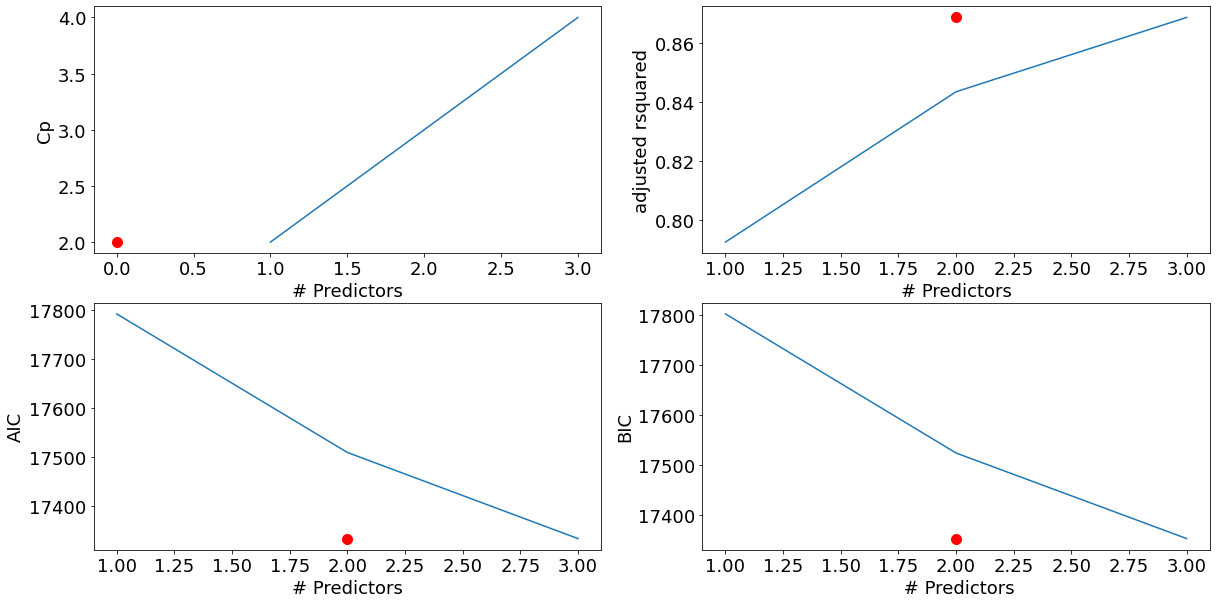

In [54]:
# Plot the result
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

## Mallow Cp
plt.subplot(2, 2, 1)
Cp= models.apply(lambda row: (row[1].params.shape[0]+(row[1].mse_total-
                               fitted_full_model.mse_total)*(train_x.shape[0]-
                                row[1].params.shape[0])/fitted_full_model.mse_total
                               ), axis=1)
plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Cp')

# adj-rsquared plot
# adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# aic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

# bic
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel(' # Predictors')
plt.ylabel('BIC')

# 전진선택법

In [55]:
########전진선택법(step=1)

def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [56]:
#### 전진선택법 모델

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])

In [57]:
Forward_best_model = forward_model(X=train_x, y= train_y)

Processed  36 models on 1 predictors in 0.023696422576904297
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002046527A9A0>
Processed  35 models on 2 predictors in 0.0278627872467041
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000204652546A0>
Processed  34 models on 3 predictors in 0.022287845611572266
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000204652548E0>
Processed  33 models on 4 predictors in 0.029806137084960938
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002046528FF40>
Processed  32 models on 5 predictors in 0.03245115280151367
Selected predictors: ['Mfg_Year', 'Automatic_airco'

In [58]:
Forward_best_model.aic

16933.97767314782

In [59]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     482.3
Date:                Tue, 02 Feb 2021   Prob (F-statistic):               0.00
Time:                        04:42:25   Log-Likelihood:                -8444.0
No. Observations:                1005   AIC:                         1.693e+04
Df Residuals:                     982   BIC:                         1.705e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year             1.9290      0.633      3.046      0.002       0.686       3.172
Automatic_airco   2352.2392    176.274     13.344      0.000    2006.322    2698.156
Weight               9.2707      1.227      7.553      0.000       6.862      11.679
KM                  -0.0173      0.001    -13.155      0.000      -0.020      -0.015
HP                  21.8611      3.419      6.395      0.000      15.153      28.570
Powered_Windows    449.6626     85.175      5.279      0.000     282.517     616.808
Sport_Model        394.8565     87.447      4.515      0.000     223.252     566.461
Quarterly_Tax       14.1491      2.083      6.791      0.000      10.061      18.238
CNG              -1128.8616    208.847     -5.405      0.000   -1538.700    -719.023
Guarantee_Period    44.2308     14.178      3.120      0.002      16.407      72.054
Tow_Bar           -294.9844     80.752     -3.653      0.000    -453.451    -136.518
Diesel             114.6506    182.279      0.629      0.530    -243.051     472.352
Airbag_2          -324.2316    106.893     -3.033      0.002    -533.996    -114.467
BOVAG_Guarantee    389.3697    133.752      2.911      0.004     126.898     651.841
Boardcomputer     -303.6311    120.942     -2.511      0.012    -540.966     -66.296
Mfr_Guarantee      210.5904     76.386      2.757      0.006      60.691     360.490
Doors               86.7043     41.050      2.112      0.035       6.148     167.260
Automatic          317.4425    143.980      2.205      0.028      34.899     599.986
Age_08_04         -119.5875      3.879    -30.830      0.000    -127.199    -111.975
Backseat_Divider  -212.1565    128.261     -1.654      0.098    -463.853      39.540
Airco              137.3964     88.690      1.549      0.122     -36.648     311.440
CD_Player          146.1825     98.797      1.480      0.139     -47.696     340.061
Mfg_Month          -99.5690     10.645     -9.354      0.000    -120.458     -78.680
Cylinders           -0.0326      0.002    -15.865      0.000      -0.037      -0.029
Petrol            1014.2029    196.270      5.167      0.000     629.046    1399.360
const               -0.0081      0.001    -15.865      0.000      -0.009      -0.007
==============================================================================
Omnibus:                       99.113   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              655.021
Skew:                           0.100   Prob(JB):                    5.81e-143
Kurtosis:                       6.950   Cond. No.                     2.41e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.06e-26. Thi

# 후진소거법

In [60]:
######## 후진선택법(step=1)
def backward(X,y,predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [61]:
# 후진 소거법 모델
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])

In [62]:
Backward_best_model = backward_model(X=train_x,y=train_y)

Processed  36 models on 35 predictors in 0.0934290885925293
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020465278A30>
Processed  35 models on 34 predictors in 0.07169890403747559
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_R

In [63]:
Backward_best_model.aic

16933.977673147794

# 단계적 선택법

In [64]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [65]:
Stepwise_best_model=Stepwise_model(X=train_x,y=train_y)

Processed  36 models on 1 predictors in 0.032067060470581055
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002046525E160>
forward
Processed  1 models on 0 predictors in 0.0069179534912109375
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000204650581C0>
Processed  35 models on 2 predictors in 0.027150630950927734
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002046525ED90>
forward
Processed  2 models on 1 predictors in 0.005046844482421875
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002046359D3D0>
Processed  34 models on 3 predictors in 0.025775909423828125
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'const']  AIC: <statsmodels.regression.linear_

In [66]:
Stepwise_best_model.aic

16933.97767314776

# 성능평가 

In [67]:
# the number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(26,) (24,) (24,)


In [68]:
# 모델에 의해 예측된/추정된 값 <->  test_y
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [69]:
perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],
                        index =['MSE', 'RMSE','MAE', 'MAPE'])

In [70]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics

In [71]:
# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)

              ALL      FORWARD     BACKWARD     STEPWISE
MSE   1.37359e+06  1.38233e+06  1.38233e+06  1.38233e+06
RMSE         1172      1175.72      1175.72      1175.72
MAE       861.786      863.873      863.873      863.873
MAPE      8.99245      9.01423      9.01423      9.01423


In [72]:
print(len(fitted_full_model.params))
print(len(Forward_best_model.params))
print(len(Backward_best_model.params))
print(len(Stepwise_best_model.params))


37
26
24
24
